# Predicting Startup Profitability

In [48]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Data
df =pd.read_csv('50_Startups.csv')

In [42]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [43]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [44]:
df.shape

(50, 5)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


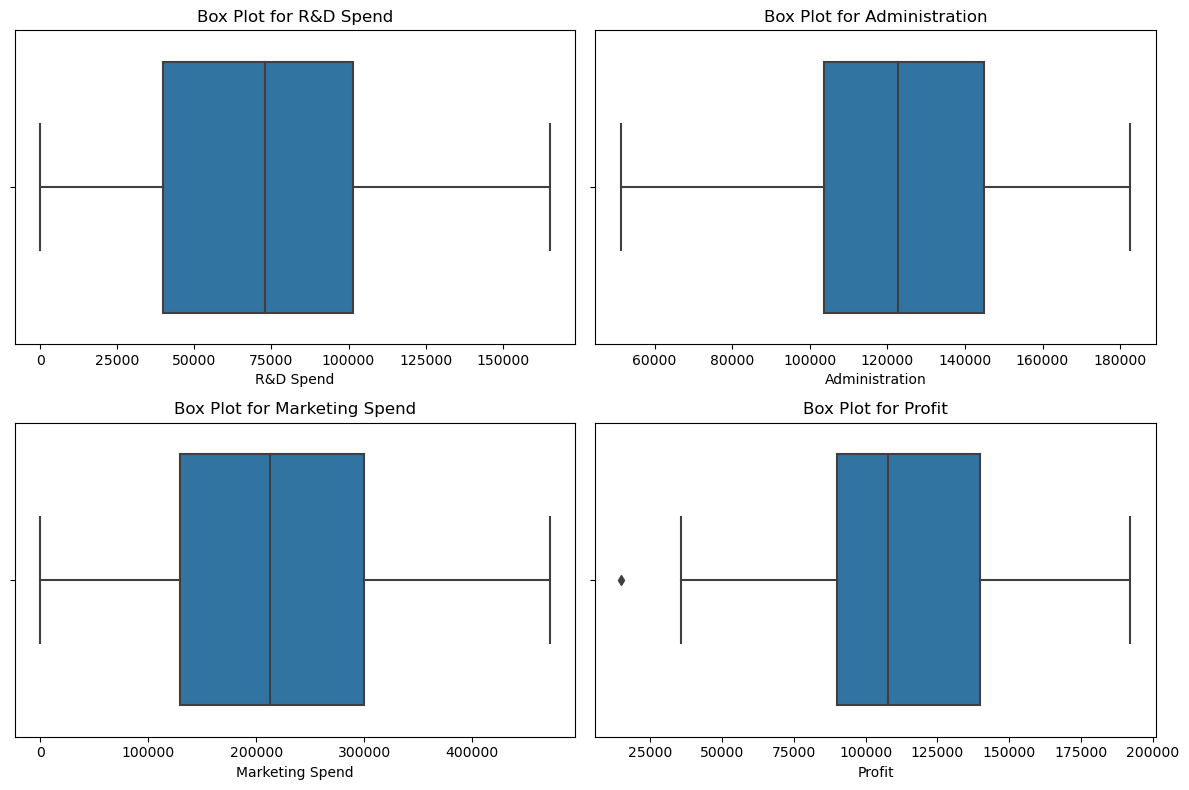

In [46]:
#Detecting outliers by drawing box plots

def draw_box_plots_numeric(df):
    numeric_columns = df.select_dtypes(include='number').columns
    num_numeric_columns = len(numeric_columns)
    rows = (num_numeric_columns + 1) // 2  # Calculate the number of rows needed

    fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))

    for i, column in enumerate(numeric_columns):
        row, col = divmod(i, 2)
        ax = axes[row, col]
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(f'Box Plot for {column}')

    # Remove any empty subplots if the number of numeric columns is odd
    if num_numeric_columns % 2 != 0:
        fig.delaxes(axes[rows - 1, 1])

    plt.tight_layout()
    plt.show()
draw_box_plots_numeric(df)

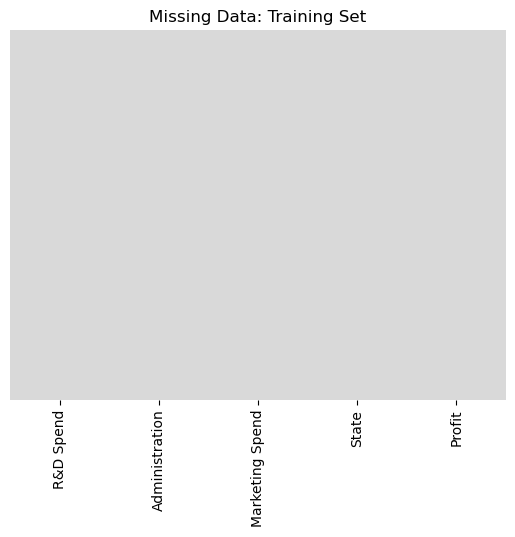

In [47]:
# Heatmap (to visualize how many missing values are there in each column)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [49]:
# One-hot encode the 'State' column to convert categorical features into numerical format
df= pd.get_dummies(df, columns=['State'], drop_first=True)

In [50]:
# Separating the dataset into features (independent variables, X) and target variable (dependent variable, y)
x = df.drop('Profit', axis=1)
y= df['Profit']

In [51]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error
# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, you can print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 82010363.04430102
Coefficients: [ 8.05630064e-01 -6.87878823e-02  2.98554429e-02  9.38793006e+02
  6.98775997e+00]
Intercept: 54028.039593645844


In [37]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
     134307.35 |     126362.88
      81005.76 |      84608.45
      99937.59 |      99677.49
      64926.08 |      46357.46
     125370.37 |     128750.48
      35673.41 |      50912.42
     105733.54 |     109741.35
     107404.34 |     100643.24
      97427.84 |      97599.28
     122776.86 |     113097.43


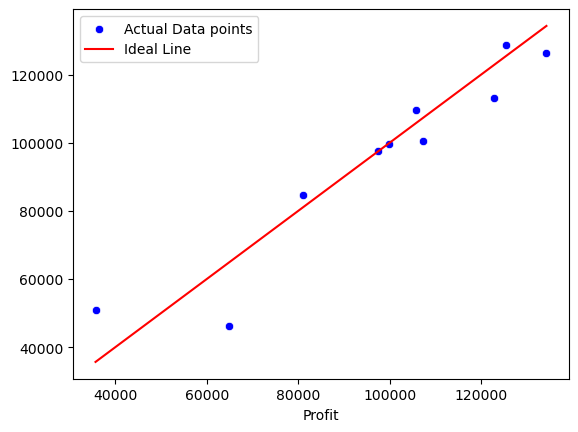

In [30]:
# Visualizing the actual vs predicted values using a scatter plot
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')

# Adding an ideal line for comparison, where predicted values perfectly match actual values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

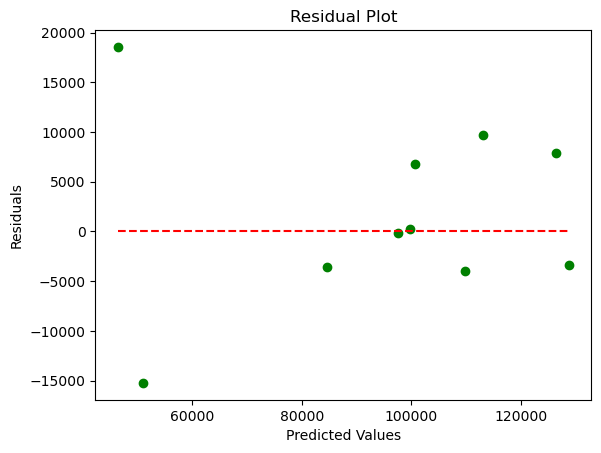

In [52]:
# Creating a residual plot to visualize the differences between actual and predicted values
residuals = y_test - y_pred

# Scatter plot of predicted values against residuals, highlighting discrepancies
plt.scatter(y_pred, residuals, color='green')

# Adding a horizontal line at y=0 to indicate where predictions match actual values
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyle='--')


plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

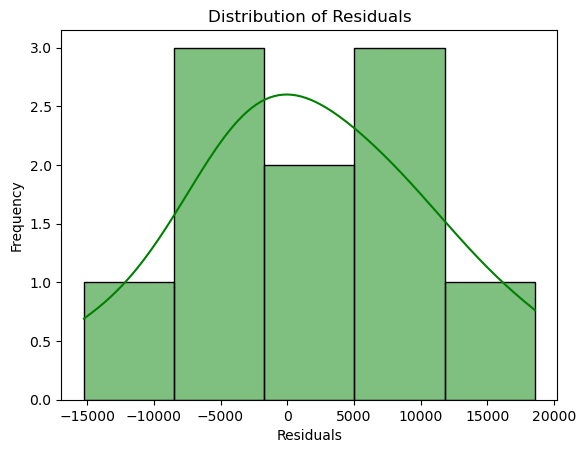

In [53]:
# Creating a histogram to visualize the distribution
sns.histplot(residuals, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  132886952.58169992


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  83646085.98998503


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  71699750.73198709
